We have artificial data for 50 startup (R&D spendings, Adminstration spendings, Marketing spendings, location/state, profit).

We have introduced a column with random values to simualte the effect of noise in data.

The State feature has categorical data (Names of states).

In this notebook, we will try:

1. Feature scaling.

2. Feature standardization.

3. Feature selection using backward elimination method.

A linear regression model is fit for the data after applying each one of the above methods.

Different models are comapred in terms of (MAE, MSE, RMSE, R-Sq, R-Sq-Adj).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, minmax_scale
from sklearn.compose import ColumnTransformer

%matplotlib inline

In [ ]:
df = pd.read_csv('50_Startups.csv', delimiter = ';')
df.head()

In [ ]:
#Summary of all numerical features
df.describe()

In [ ]:
#Summary of the categorical feature
df.State.describe()

In [ ]:
#Check for Null value
df['R&D Spend'].isnull().values.any(),df['Administration'].isnull().values.any(), df['Marketing Spend'].isnull().values.any(),df['State'].isnull().values.any()

In [ ]:
#Fill null values with the mean value of each column
df['R&D Spend'] = df['R&D Spend'].fillna(df['R&D Spend'].mean())
df['Administration'] = df['Administration'].fillna(df['Administration'].mean())
df['Marketing Spend'] = df['Marketing Spend'].fillna(df['Marketing Spend'].mean())

In [ ]:
df.info()

In [ ]:
sns.pairplot(df)

In [ ]:
#Adding a new column with random numbers to simulate noise in the data
# X variable represents the features
# Y variable represents the response
rand = pd.DataFrame(np.random.randint(1,1000,(df.shape[0],1)),columns=['random'])
x = pd.concat([df.iloc[:,:-1] , rand], axis=1)
y = df[['Profit']]
x.shape, y.shape

In [ ]:
x.head()

In [ ]:
#Reordering the coulmns of x
cols = x.columns.tolist()
cols_reordered = [cols[3]] + cols[:3] + [cols[4]]

In [ ]:
x = x[cols_reordered]
x.head()

In [ ]:
#Converting categorical non-numeric feature to numerical feature
le = LabelEncoder()
le.fit(x.State)
le.classes_

In [ ]:
x.State = le.transform(x.State)

In [ ]:
x.head()

In [ ]:
#Split the new categorical numeric feature into 3 binary columns (0, 1)
ohe = OneHotEncoder(categorical_features=[0])

In [ ]:
x = ohe.fit_transform(x.values).toarray()

In [ ]:
#Creating a new dataframe for the sparse matrix
cols2 = le.classes_.tolist() + cols_reordered[1:]

In [ ]:
x = pd.DataFrame(x,columns=cols2)

In [ ]:
x.shape, y.shape

In [ ]:
#Drop one column from the three binary columns recently added (Dummy variable)
x = x.drop(columns=['California'])

# Linear Regression with original data

Data has features of different scales, but we will fit a linear regression model without scaling and calculate some metrics (MAE, MSE, RMSE, R-Sq, R-Sq-Adj).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
lm1 = LinearRegression()
lm1.fit(x_train,y_train)

In [ ]:
lm1.intercept_, lm1.coef_

In [ ]:
y_pred1 = lm1.predict(x_test)

In [ ]:
MAE1, MSE1, R_Sq1, RMSE1 = mean_absolute_error(y_test,y_pred1), mean_squared_error(y_test,y_pred1), r2_score(y_test,y_pred1), np.sqrt(mean_squared_error(y_test,y_pred1))

R-Sq-Adjusted formula:
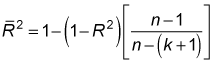
where:
    n: number of examples.
    k: number of features.

In [ ]:
n = y_test.shape[0] 
p = y_test.shape[1]
R_Sq_adj1 = 1 - (1 - R_Sq1) * ((n - 1)/(n - p - 1))

In [ ]:
print('MAE: {}, MSE: {}, R-Sq: {}, RMSE: {}, R-Sq-Adj: {}'.format(round(MAE1,3), round(MSE1,3), round(R_Sq1,3), round(RMSE1,3), round(R_Sq_adj1,3)))

# Linear Regression with Features Scaling

In [ ]:
x_sc = minmax_scale(x)
y_sc = minmax_scale(y)

In [ ]:
x_train_sc, x_test_sc, y_train_sc, y_test_sc = train_test_split(x_sc, y_sc, test_size = 0.2)

In [ ]:
lm2 = LinearRegression()
lm2.fit(x_train_sc,y_train_sc)

In [ ]:
lm2.intercept_, lm2.coef_

In [ ]:
y_pred2 = lm2.predict(x_test_sc)

In [ ]:
MAE2, MSE2, R_Sq2, RMSE2 = mean_absolute_error(y_test_sc,y_pred2), mean_squared_error(y_test_sc,y_pred2), r2_score(y_test_sc,y_pred2), np.sqrt(mean_squared_error(y_test_sc,y_pred2))
R_Sq_adj2 = 1 - (1 - R_Sq2) * ((n - 1)/(n - p - 1))

In [ ]:
print('MAE: {}, MSE: {}, R-squared: {}, RMSE: {}, R-Sq-Adj: {}'.format(round(MAE2,3), round(MSE2,3), round(R_Sq2,3), round(RMSE2,3), round(R_Sq_adj2,3)))

# Linear Regression with Feature standardization

In [ ]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

In [ ]:
x_st = x_scaler.fit_transform(x)
y_st = y_scaler.fit_transform(y)

In [ ]:
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(x_st, y_st, test_size = 0.2)

In [ ]:
lm3 = LinearRegression()
lm3.fit(x_train_st,y_train_st)

In [ ]:
lm3.intercept_, lm3.coef_

In [ ]:
y_pred3 = lm3.predict(x_test_st)

In [ ]:
MAE3, MSE3, R_Sq3, RMSE3 = mean_absolute_error(y_test_st,y_pred3), mean_squared_error(y_test_st,y_pred3), r2_score(y_test_st,y_pred3), np.sqrt(mean_squared_error(y_test_st,y_pred3))
R_Sq_adj3 = 1 - (1 - R_Sq3) * ((n - 1)/(n - p - 1))

In [ ]:
print('MAE: {}, MSE: {}, R-squared: {}, RMSE: {}, R-Sq-Adj: {}'.format(round(MAE3,3), round(MSE3,3), round(R_Sq3,3), round(RMSE3,3), round(R_Sq_adj3,3)))

# Features selection using Backward Elimination Method

In [ ]:
#Standardized data will be used
#Create data frames for features and reponse data.
x_df = pd.DataFrame(x_st,columns= x.columns.tolist())
y_df = pd.DataFrame(y_st,columns=['Profit'])

In [ ]:
x_df.head()

In [ ]:
import statsmodels.api as sm
sl = 0.05

In [ ]:
# Add the constant to features since statsmodels.OLS doesn't add them.
x_df = sm.add_constant(x_df)

In [ ]:
x_df.head()

In [ ]:
# Function to automate the feature elimination process
# In each iteration, the faeture with max p-value & its p-value is greater than significance level, 0.05
# is eliminated
#The function returns the statistically significant features and the fitted OLS model.
def feature_eliminate(x, y):
    a = False
    while a is False:
        regressor = sm.OLS(endog= y , exog= x).fit()
        for i in regressor.pvalues.values:
            if  regressor.pvalues.values.max() > 0.05:
                if i == regressor.pvalues.values.max():
                    drop_feature = regressor.pvalues[regressor.pvalues == i].index[0]
                    x = x.drop(columns = drop_feature)
                    break
            else:
                a = True
                break
    return x, regressor

In [ ]:
features_significant, model = feature_eliminate(x_df,y_df)

In [ ]:
model.summary()

# Linear Regression for statistically significant features.

In [ ]:
x_train_selected, x_test_selected, y_train_selected, y_test_selected = train_test_split(features_significant, y_df, test_size = 0.2)

In [ ]:
lm4 = LinearRegression()
lm4.fit(x_train_selected,y_train_selected)

In [ ]:
lm4.intercept_, lm4.coef_

In [ ]:
y_pred4 = lm4.predict(x_test_selected)

In [ ]:
MAE4, MSE4, R_Sq4, RMSE4 = mean_absolute_error(y_test_selected,y_pred4), mean_squared_error(y_test_selected,y_pred4), r2_score(y_test_selected,y_pred4), np.sqrt(mean_squared_error(y_test_selected,y_pred4))
R_Sq_adj4 = 1 - (1 - R_Sq4) * ((n - 1)/(n - p - 1))

In [ ]:
print('MAE: {}, MSE: {}, R-squared: {}, RMSE: {}, R-Sq-Adj: {}'.format(round(MAE4,3), round(MSE4,3), round(R_Sq4,3), round(RMSE4,3), round(R_Sq_adj4,3)))

# Models Comparison

In [ ]:
pd.DataFrame([[MAE1, MSE1, R_Sq1, RMSE1, R_Sq_adj1],[MAE2, MSE2, R_Sq2, RMSE2, R_Sq_adj2],[MAE3, MSE3, R_Sq3, RMSE3, R_Sq_adj3],[MAE4, MSE4, R_Sq4, RMSE4, R_Sq_adj4]], columns=['MAE','MSE','R-Sq','RMSE','R-Sq-Adj'], index= ['Original_Data','Scaled_Data','Standardized_Data', 'Stat_Sign_Features'])